In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
data = pd.read_csv('data.csv')
data

,Mois,Accenteur mouchet,Corneille noire,Fauvette à tête noire,Geai des chênes,Goéland argenté,Grimpereau des jardins,Grive musicienne,Merle noir,Mésange bleue,...,Pigeon biset,Pigeon ramier,Pinson des arbres,Pouillot véloce,Roitelet huppé,Roitelet à triple bandeau,Rougegorge familier,Sittelle torchepot,Troglodyte mignon,Étourneau sansonnet
0,janvier,1,22,0,4,0,3,1,22,16,...,1,37,3,0,4,0,14,0,5,33
1,fevrier,1,9,0,3,0,4,1,13,7,...,1,8,3,1,2,0,6,2,4,7
2,mars,0,25,6,2,1,7,3,24,16,...,17,24,11,3,1,2,9,2,10,16
3,avril,3,7,8,2,0,2,0,12,7,...,3,10,3,2,0,1,1,0,5,35
4,mai,0,7,10,1,0,5,0,24,4,...,8,9,6,4,0,0,11,0,7,48
5,juin,0,15,11,1,0,5,0,23,8,...,3,25,5,2,6,0,11,0,12,75
6,juillet,0,10,3,2,0,5,0,11,6,...,4,13,3,1,4,0,4,0,2,2
7,aout,6,21,1,1,0,2,0,17,10,...,7,14,0,1,0,0,10,0,5,0
8,septembre,2,15,1,1,0,5,0,10,11,...,2,32,1,0,0,5,12,3,5,0
9,octobre,0,6,0,1,0,1,1,4,4,...,1,34,0,0,0,2,6,2,1,0


## Analyse préliminaire

In [3]:
# Combien d'individus toute espèce confondue ont été observés dans le parc ?
total_individuals = data.sum(numeric_only=True).sum() #numeric only permet d'exclure la colonne des mois
print("Nombre total d'individus: ", total_individuals)

Nombre total d'individus:  1672


In [4]:
# Quelle espèce a été la plus observée dans l’année
max_individuals = data.sum(numeric_only=True).max()
max_individuals_species = data.sum(numeric_only=True).idxmax()
print("Espèce la plus observée: ", max_individuals_species, "avec ", max_individuals, "individus")

Espèce la plus observée:  Pigeon ramier avec  232 individus


In [5]:
#  Quelle espèce a été la moins observée dans l’année
min_individuals = data.sum(numeric_only=True).min()
min_individuals_species = data.sum(numeric_only=True).idxmin()
print("Espèce la moins observée: ", min_individuals_species, "avec ", min_individuals, "individus")

Espèce la moins observée:  Goéland argenté avec  1 individus


### Espèces absentes
On remarques que des valeurs sont égales à zero pour certaines espèces. 
On en déduit que ces espèces n'ont pas été observées assez souvent pour représenter un intérêt pour l'analyse.
On va donc les supprimer du dataset.

In [6]:
# Supprimer les colonnes qui contiennent zéro
colonnes_supprimees = data.columns[data.eq(0).any()]
data_sans_zeros = data.drop(colonnes_supprimees, axis=1)

# Afficher les noms des colonnes supprimées
noms_colonnes_supprimees = colonnes_supprimees.tolist()
print(len(noms_colonnes_supprimees), " Colonnes supprimées :", noms_colonnes_supprimees)

15  Colonnes supprimées : ['Accenteur mouchet', 'Fauvette à tête noire', 'Goéland argenté', 'Grive musicienne', 'Mésange huppée', 'Mésange noire', 'Mésange à longue queue', 'Pic vert', 'Pic épeiche', 'Pinson des arbres', 'Pouillot véloce', 'Roitelet huppé', 'Roitelet à triple bandeau', 'Sittelle torchepot', 'Étourneau sansonnet']


### Analyse des éspèces significatives
Après avoir supprimé les espèces on va pouvoir analyser les espèces qui sont significatives. En commencant par la variance des espèces.

In [7]:
# Calculer la variance pour chaque espèce
variance = data_sans_zeros.var(numeric_only=True)
print("Variance pour chaque espèce:\n", variance)

Variance pour chaque espèce:
 Corneille noire            49.174242
Geai des chênes             2.446970
Grimpereau des jardins      3.515152
Merle noir                 54.446970
Mésange bleue              17.333333
Mésange charbonnière       31.696970
Perruche à collier         30.568182
Pie bavarde                21.295455
Pigeon biset               23.477273
Pigeon ramier             119.151515
Rougegorge familier        22.272727
Troglodyte mignon          10.992424
dtype: float64


In [8]:
# Quelle est l'éspèce qui a la plus grande variance ?
max_variance = variance.max()
max_variance_species = variance.idxmax()
print("Espèce avec la plus grande variance: ", max_variance_species, "avec {0:.3f}".format(max_variance), "de variance")

Espèce avec la plus grande variance:  Pigeon ramier avec 119.152 de variance


In [9]:
# Quelle est l'éspèce qui a la plus petite variance ?
min_variance = variance.min()
min_variance_species = variance.idxmin()
print("Espèce avec la plus petite variance: ", min_variance_species, "avec {0:.3f}".format(min_variance), "de variance")

Espèce avec la plus petite variance:  Geai des chênes avec 2.447 de variance


### Étude particulière des perruches à collier.

In [10]:
# Extraire les stats pour les peruches
observation_perruches = data[['Mois', 'Perruche à collier']]
observation_perruches

,Mois,Perruche à collier
0,janvier,18
1,fevrier,2
2,mars,16
3,avril,7
4,mai,9
5,juin,13
6,juillet,4
7,aout,2
8,septembre,12
9,octobre,4


,Perruche à collier
count,12.00000
mean,8.25000
std,5.52885
min,2.00000
25%,3.75000
50%,8.00000
75%,12.25000
max,18.00000


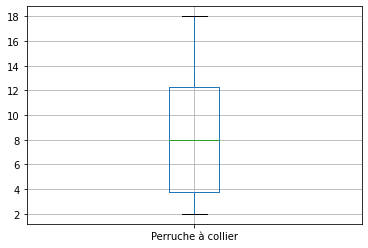

In [11]:
# boxplot
observation_perruches.boxplot()
observation_perruches.describe()

TODO: Commentaires sur l'histogramme des perruches à collier.

C:\Users\Hadouin\AppData\Local\Temp\ipykernel_3272\4108336320.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyenne_par_mois = data_sans_perruches.mean(axis=1)


<Axes: >

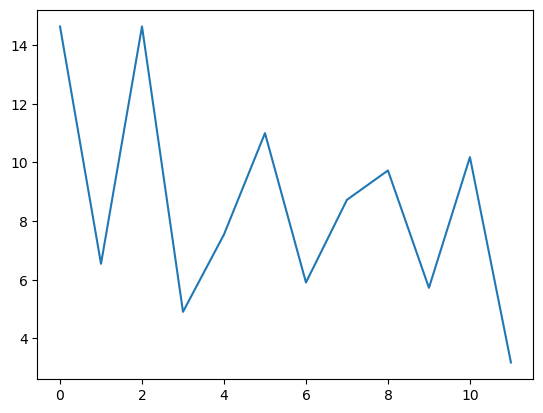

In [12]:
# On supprime la colonne des perruches à collier
data_sans_perruches = data_sans_zeros.drop(['Perruche à collier'], axis=1)
# On calcule la moyenne par mois
moyenne_par_mois = data_sans_perruches.mean(axis=1)
moyenne_par_mois.name = 'Moyenne générale'

# Plot de la moyenne générale par mois
moyenne_par_mois.plot()

<Axes: xlabel='Mois'>

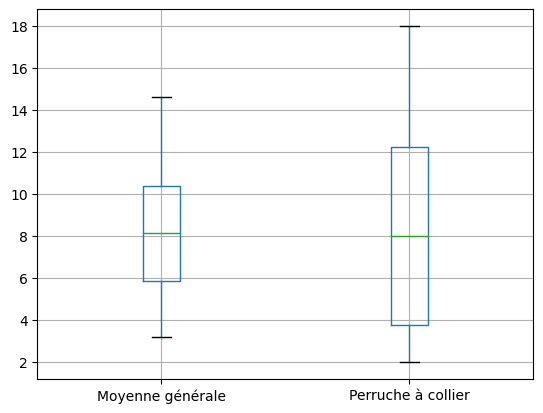

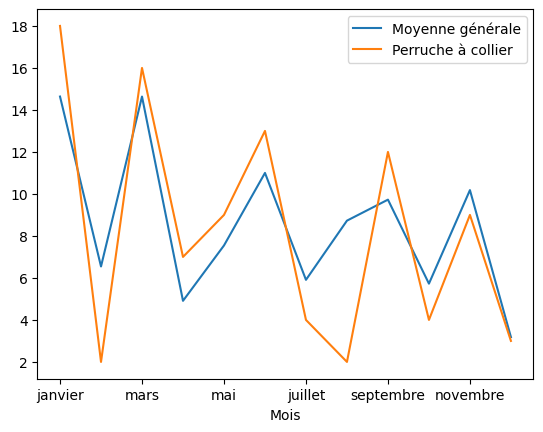

In [13]:
# ajouter la column des perruches à collier à la moyenne par mois
moyenne_par_mois_plus_perruches = pd.concat([moyenne_par_mois, observation_perruches['Perruche à collier']], axis=1)
# Changer les valeurs au nom des mois qui est le contenu de la colonne 'Mois'
moyenne_par_mois_plus_perruches.index = data['Mois']

moyenne_par_mois_plus_perruches.boxplot()
moyenne_par_mois_plus_perruches.plot()

### Comprarer les deux courbes 
TODO: Commentaires sur les deux courbes.
on remarque que les deux courbes sont très proches. 
En revanche on voit qu'au mois d'août il y a une différence entre les deux courbes.
On peut donc en déduire que les perruches à collier sont moins présentes au mois d'août.
Pourquoi ?
- Les perruches à collier sont en vacances.


In [14]:
# Correlation entre perruche et chaque autre espèce
correlation_perruche = data_sans_zeros.corrwith(data_sans_zeros['Perruche à collier'])
correlation_perruche = correlation_perruche.drop(['Perruche à collier'])
print("Correlation entre perruche et chaque autre espèce:\n", correlation_perruche)


Correlation entre perruche et chaque autre espèce:
 Corneille noire           0.620783
Geai des chênes           0.239133
Grimpereau des jardins    0.543741
Merle noir                0.657924
Mésange bleue             0.722741
Mésange charbonnière      0.753500
Pie bavarde               0.738454
Pigeon biset              0.258755
Pigeon ramier             0.641700
Rougegorge familier       0.590548
Troglodyte mignon         0.643477
dtype: float64


C:\Users\Hadouin\AppData\Local\Temp\ipykernel_3272\2219495563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_perruche = data_sans_zeros.corrwith(data_sans_zeros['Perruche à collier'])


In [15]:
# Max correlation a part les perruches
max_correlation = correlation_perruche.max()
max_correlation_species = correlation_perruche.idxmax()
print("Espèce avec la plus grande correlation avec les perruches: ", max_correlation_species, "avec {0:.3f}".format(max_correlation), "de correlation")

Espèce avec la plus grande correlation avec les perruches:  Mésange charbonnière avec 0.754 de correlation


In [16]:
# Min correlation a part les perruches
min_correlation = correlation_perruche.min()
min_correlation_species = correlation_perruche.idxmin()
print("Espèce avec la plus petite correlation avec les perruches: ", min_correlation_species, "avec {0:.3f}".format(min_correlation), "de correlation")

Espèce avec la plus petite correlation avec les perruches:  Geai des chênes avec 0.239 de correlation


Text(0.5, 1.0, 'Correlation entre les perruches et les autres espèces')

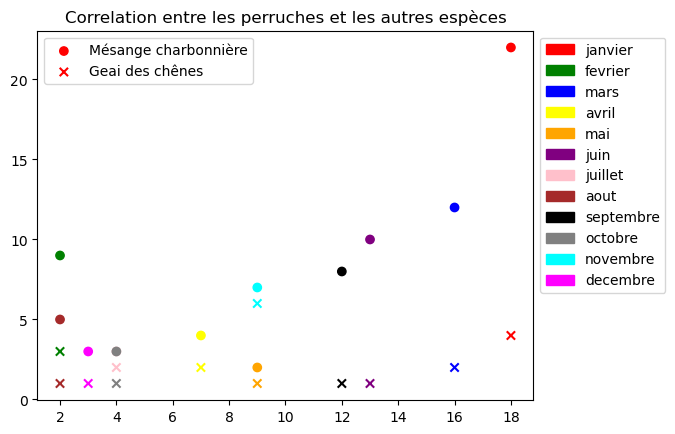

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
couleurs = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey', 'cyan', 'magenta']

# Pour chaque mois creer un patch de legende
patches = []
for i in range(len(data['Mois'])):
    patches.append(mpatches.Patch(color=couleurs[i], label=data['Mois'][i]))

donnees_selectionnees = data[['Mois', 'Perruche à collier', max_correlation_species, min_correlation_species]]

ax.scatter(x='Perruche à collier', y=max_correlation_species, c=couleurs, data=donnees_selectionnees)
ax.scatter(x='Perruche à collier', y=min_correlation_species, c=couleurs, data=donnees_selectionnees, marker='x')
legend1 = ax.legend([max_correlation_species, min_correlation_species], loc='upper left');
plt.gca().add_artist(legend1)


ax.legend(handles=patches, bbox_to_anchor=(1, 1))
plt.title('Correlation entre les perruches et les autres espèces')

TODO: Commentaires sur les deux courbes.

## Analyse en Composante Principale (ACP)
https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html
https://colab.research.google.com/github/OpenClassrooms-Student-Center/4525281-realisez-une-analyse-exploratoire-de-donnees/blob/main/notebooks/P2C6_TP_cours_effectuees.ipynb#scrollTo=k0l5bFL4Vrjm  


In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler

data_sans_zeros_sans_mois = data_sans_zeros.drop(['Mois'], axis=1)
t_data_sans_zeros_sans_mois = np.transpose(data_sans_zeros_sans_mois)
normalized_data = normalize(t_data_sans_zeros_sans_mois)
scaled_data = StandardScaler().fit_transform(normalized_data)

idx = ["mean", "std"]

pd.DataFrame(scaled_data).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04


In [19]:
pca = PCA()
pca.fit(scaled_data)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.324511e+00,25.0,25.0
1,Dim2,2.571970e+00,20.0,45.0
2,Dim3,1.909230e+00,15.0,60.0
3,Dim4,1.560691e+00,12.0,72.0
4,Dim5,1.301589e+00,10.0,81.0
5,Dim6,1.051942e+00,8.0,90.0
6,Dim7,8.399131e-01,6.0,96.0
7,Dim8,2.662546e-01,2.0,98.0
8,Dim9,1.591031e-01,1.0,99.0
9,Dim10,1.036257e-01,1.0,100.0


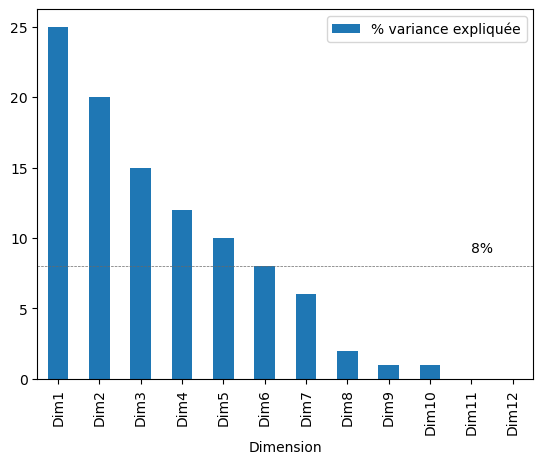

In [20]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(10, 9, "8%") # ajout de texte
plt.axhline(y = 8, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 8 = 100 / 12 (nb dimensions)
plt.show()

In [21]:
data_pca = pca.transform(scaled_data)
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1],
    "Specie" : data_sans_zeros_sans_mois.columns,
    "Month" : data["Mois"],
})

data_pca_df

,Dim1,Dim2,Specie,Month
0,0.338582,0.267561,Corneille noire,janvier
1,0.492415,3.604887,Geai des chênes,fevrier
2,0.497621,-0.938013,Grimpereau des jardins,mars
3,0.482159,-1.571245,Merle noir,avril
4,0.141449,0.543312,Mésange bleue,mai
5,-1.648125,1.099153,Mésange charbonnière,juin
6,-0.972634,-1.004933,Perruche à collier,juillet
7,-0.161874,0.291464,Pie bavarde,aout
8,4.807315,0.258823,Pigeon biset,septembre
9,-2.766877,0.526802,Pigeon ramier,octobre


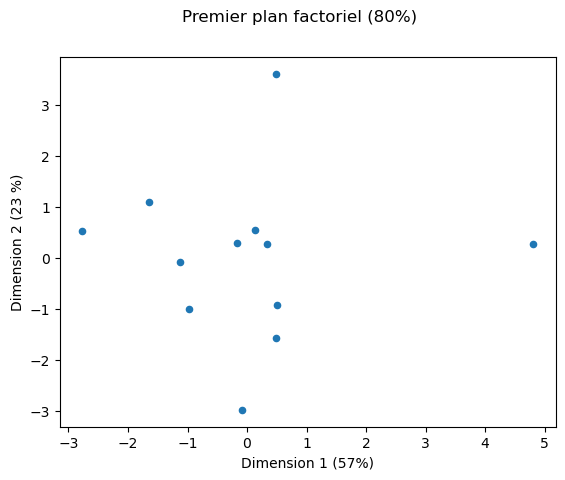

In [22]:
data_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (80%)") # titre général
plt.show()

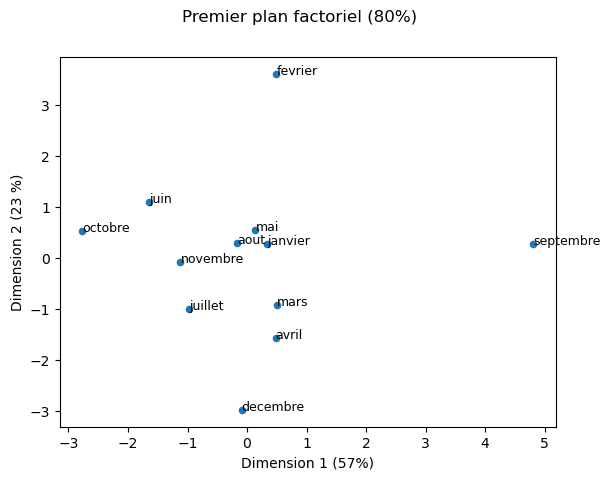

In [23]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque espece
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 0) | (abs(k[1]['Dim2']) > 2):
        ax.annotate(k[1]["Month"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (80%)") # titre général
plt.show()

In [24]:
x_list = range(1, 12+1);
list(x_list);

pcs = pca.components_;
pcs = pd.DataFrame(pcs, columns=data_sans_zeros_sans_mois.columns)
pcs.index = [f"F{i}" for i in range(12)]
pcs.round(2)

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
F0,-0.43,-0.11,0.38,0.05,0.23,-0.26,0.14,0.18,-0.41,-0.35,0.19,0.38
F1,0.23,0.22,-0.26,-0.09,-0.46,-0.55,0.11,-0.12,-0.16,0.14,0.37,0.29
F2,-0.04,0.56,-0.25,0.27,0.20,0.13,0.34,-0.24,-0.23,-0.34,0.16,-0.35
F3,0.36,0.29,0.38,0.02,-0.29,0.05,-0.11,-0.19,-0.13,-0.37,-0.54,0.22
F4,-0.12,0.20,0.20,-0.51,0.08,-0.11,0.68,-0.01,0.35,0.12,-0.20,0.01
F5,0.14,0.29,-0.12,-0.58,0.07,0.04,-0.29,0.58,-0.18,-0.22,0.08,-0.18
F6,-0.01,0.16,-0.01,0.52,-0.29,0.03,0.26,0.71,0.15,0.08,-0.13,0.04
F7,-0.29,0.19,0.03,-0.06,-0.09,0.13,-0.02,-0.03,-0.61,0.62,-0.30,-0.07
F8,0.59,-0.16,-0.08,0.13,0.58,-0.31,0.17,0.12,-0.23,0.17,-0.22,0.02
F9,0.24,-0.43,0.31,-0.07,-0.37,0.06,0.31,0.03,-0.29,-0.09,0.19,-0.53


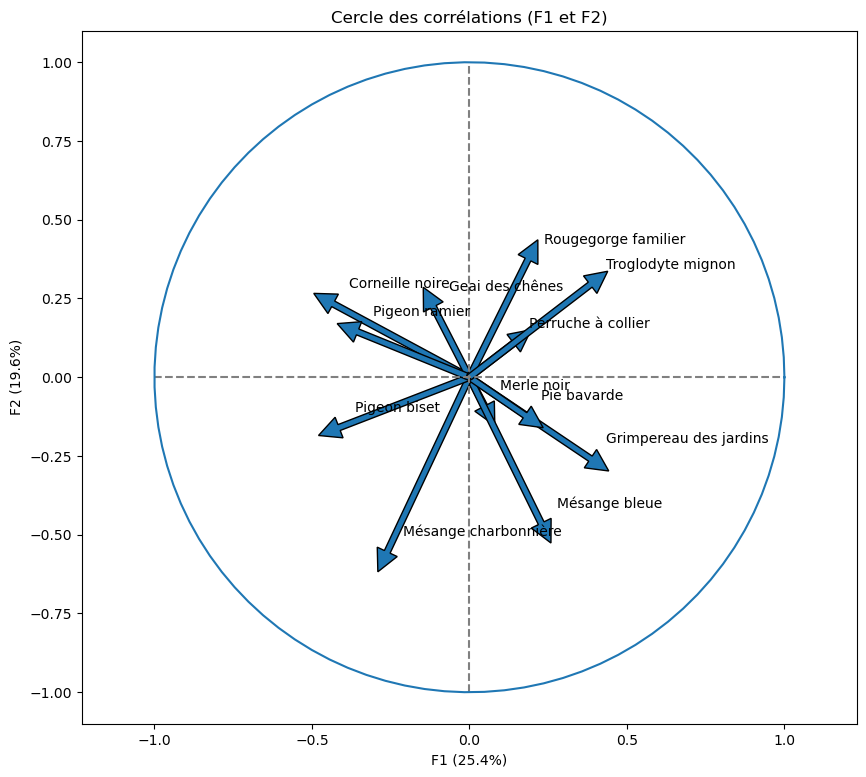

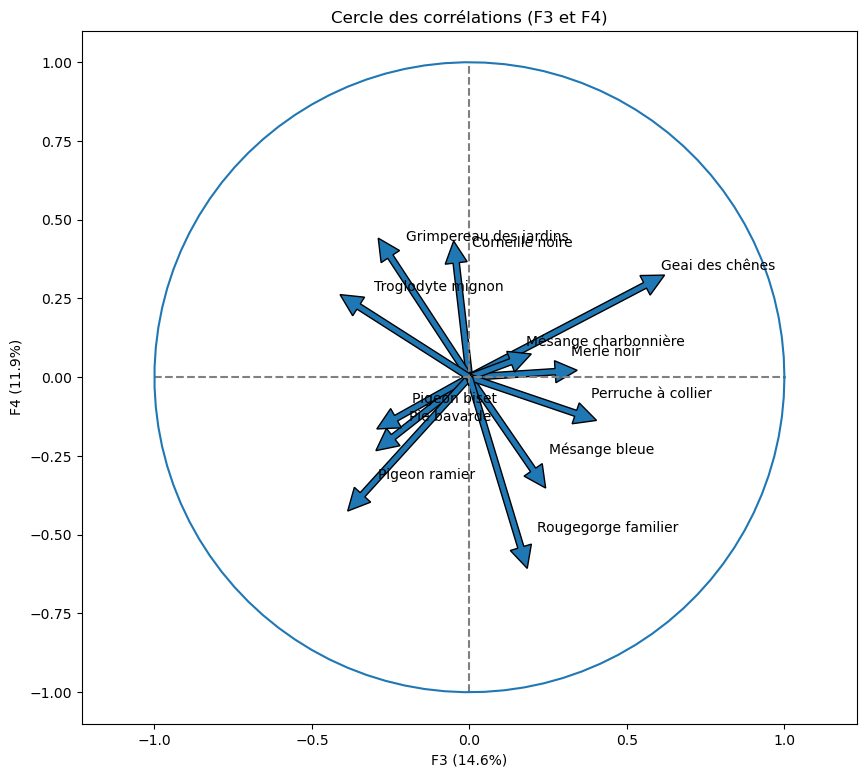

In [25]:
x, y = 0,1

def correlation_graph(pca,x_y,features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

correlation_graph(pca,[0,1],data_sans_zeros_sans_mois.columns)

correlation_graph(pca,[2,3],data_sans_zeros_sans_mois.columns)


TODO: Interprétation des graphiques.

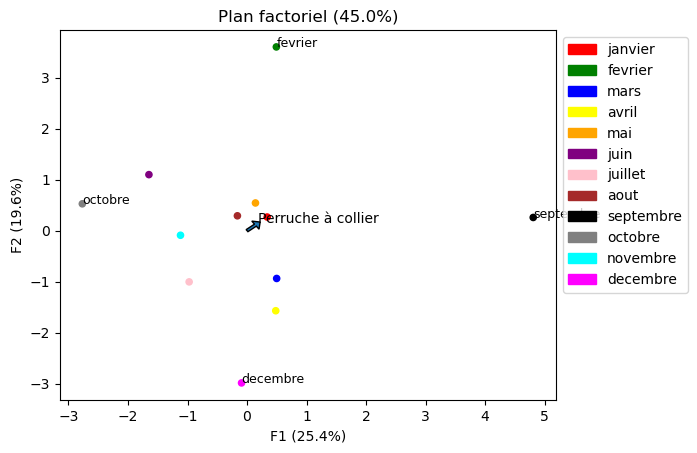

In [26]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax, c=couleurs) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque espece
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 2) | (abs(k[1]['Dim2']) > 2):
        ax.annotate(k[1]["Month"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
ax.legend(handles=patches, bbox_to_anchor=(1, 1))

x,y = 0,1
i = 6
features=data_sans_zeros_sans_mois.columns
# Les flèches
ax.arrow(0,0, 
        pca.components_[x, i],  
        pca.components_[y, i],  
        head_width=0.2,
        head_length=0.1, 
        width=0.05, )
# Les labels
plt.text(pca.components_[x, i] + 0.05,
        pca.components_[y, i] + 0.05,
        features[i])
# Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Plan factoriel ({}%)".format(eig["% cum. var. expliquée"][y]))

plt.show()

On voit que la fléche pointe vers janvier.

## Régression Linéaire Simple
### Appliquer la régression linéaire simple

Coefficient de détermination R2 non ajusté: 0.5677624798311145
Coefficient de détermination R2 ajusté: 0.524538727814226
Valeur prédite de β0: 1.0032218091697596
Valeur prédite de β1: 0.7672862453531604


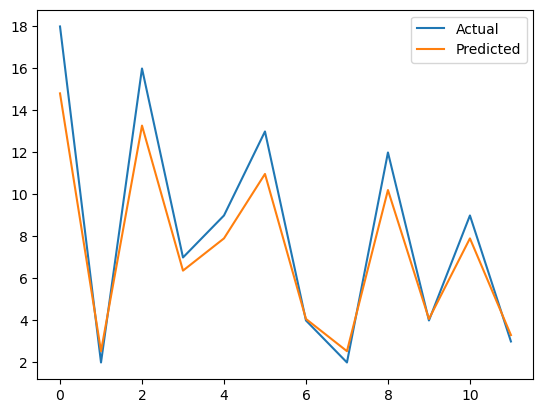

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = data_sans_zeros_sans_mois["Perruche à collier"].values.reshape(-1,1)
y = data_sans_zeros_sans_mois[max_correlation_species].values.reshape(-1,1)

regression_model = LinearRegression()
regression_model.fit(x,y)

intercept = regression_model.intercept_[0]
slope = regression_model.coef_[0][0]

x_pred = regression_model.predict(x)

# Calculer le R²
r2 = r2_score(y, x_pred)

# Calculer le R² ajusté
n = len(x)
p = 1
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Afficher les résultats
print("Coefficient de détermination R2 non ajusté:", r2)
print("Coefficient de détermination R2 ajusté:", r2_adj)
print("Valeur prédite de β0:", intercept)
print("Valeur prédite de β1:", slope)

# Show dataframe compare actual and predicted values
actual_pred_comparison = pd.DataFrame({'Actual': x.flatten(), 'Predicted': x_pred.flatten()})
actual_pred_comparison.plot();


### Calcul de l'inteval de confiance

In [32]:
# Calcul de l'interval de confiance a 90% pour la pente et l'ordonnée à l'origine
from sklearn.utils import resample

n_bootstrap = 1000

coef_bootstraps = []
for _ in range(n_bootstrap):
    x_boot, y_boot = resample(x, y)
    regression_model_boot = LinearRegression()
    regression_model_boot.fit(x_boot, y_boot)

    coef_bootstraps.append(regression_model_boot.coef_[0][0])

bootstrap_ci_slope = np.percentile(coef_bootstraps, [5, 95])

# Calculer l'intervalle de confiance pour l'ordonnée à l'origine (β0)
intercept_bootstraps = []
for _ in range(n_bootstrap):
    x_boot, y_boot = resample(x, y)
    regression_model_boot = LinearRegression()
    regression_model_boot.fit(x_boot, y_boot)

    intercept_bootstraps.append(regression_model_boot.intercept_[0])

bootstrap_ci_intercept = np.percentile(intercept_bootstraps, [5, 95])
# Afficher les intervalles de confiance
print("Intervalle de confiance à 90% pour la pente (β1):", bootstrap_ci_slope)
print("Intervalle de confiance à 90% pour l'ordonnée à l'origine (β0):", bootstrap_ci_intercept) 

Intervalle de confiance à 90% pour la pente (β1): [0.22541475 1.13674285]
Intervalle de confiance à 90% pour l'ordonnée à l'origine (β0): [-3.22920893  4.68415954]


### Evaluer l'hypothèse de pente nulle pour β1
13. Evaluez l’hypothèse de pente nulle pour le coefficient β1 et concluez sur l’existence d’une relation linéaire entre les deux variables. Le coefficient β1 est-il significativement non nul ?


In [35]:
# evaluer l'lhypothèse de pente nulle
import statsmodels.api as sm

# Supposons que vous ayez les variables indépendantes X et dépendantes y


# Ajoutez une colonne de 1 pour représenter l'intercept dans le modèle
X = sm.add_constant(x)

# Créez le modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustez le modèle aux données
results = model.fit()

# Affichez un résumé des résultats de régression
print(results.summary())

# Obtenez la valeur du coefficient β1
beta1 = results.params[1]

# Obtenez le p-value associé au coefficient β1
p_value = results.pvalues[1]

# Affichez le coefficient β1 et le p-value
print("Coefficient β1 :", beta1)
print("p-value :", p_value)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     13.14
Date:                Thu, 25 May 2023   Prob (F-statistic):            0.00466
Time:                        15:10:24   Log-Likelihood:                -32.210
No. Observations:                  12   AIC:                             68.42
Df Residuals:                      10   BIC:                             69.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0032      2.075      0.483      0.6

c:\Users\Hadouin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Le p-value associé au coefficient β1 est une mesure de la significativité statistique.
Si le p-value est inférieur à un certain seuil de signification (généralement 0.05), on peut rejeter l'hypothèse nulle de pente nulle et conclure que le coefficient β1 est significativement non nul, 
ce qui indique une relation linéaire significative entre les variables.
C'est notre cas ici.

14. Reprenez les questions 11 à 13 en effectuant une régression linéaire simple entre la variable perruche à collier et celle de valeure de corrélation minimale. Concluez sur l’existence d’une relation linéaire entre les deux variables.

Coefficient de détermination R2 non ajusté: 0.05718461910297279
Coefficient de détermination R2 ajusté: -0.03709691898672984
Valeur prédite de β0: 1.5251548946716231
Valeur prédite de β1: 0.06765799256505581
Intervalle de confiance à 90% pour la pente (β1): [-0.0592681   0.16328668]
Intervalle de confiance à 90% pour l'ordonnée à l'origine (β0): [0.62590322 2.51576329]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6065
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.454
Time:                        15:15:24   Log-Likelihood:                -21.521
No. Observations:                  12   AIC:                             47.04
Df Residuals:                      10   BIC:                             48

c:\Users\Hadouin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


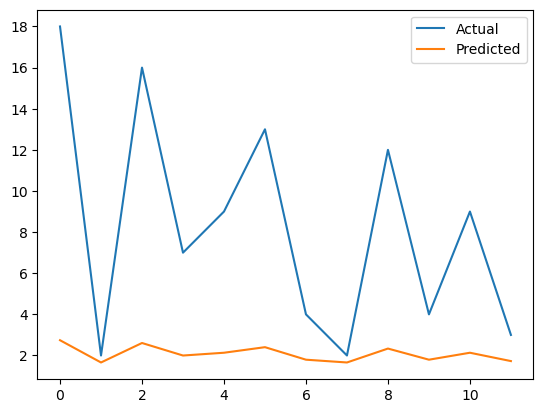

In [37]:
# ici on change la variable y pour le min
x = data_sans_zeros_sans_mois["Perruche à collier"].values.reshape(-1,1)
y = data_sans_zeros_sans_mois[min_correlation_species].values.reshape(-1,1)

regression_model = LinearRegression()
regression_model.fit(x,y)

intercept = regression_model.intercept_[0]
slope = regression_model.coef_[0][0]

x_pred = regression_model.predict(x)

# Calculer le R²
r2 = r2_score(y, x_pred)

# Calculer le R² ajusté
n = len(x)
p = 1
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Afficher les résultats
print("Coefficient de détermination R2 non ajusté:", r2)
print("Coefficient de détermination R2 ajusté:", r2_adj)
print("Valeur prédite de β0:", intercept)
print("Valeur prédite de β1:", slope)

# Show dataframe compare actual and predicted values
actual_pred_comparison = pd.DataFrame({'Actual': x.flatten(), 'Predicted': x_pred.flatten()})
actual_pred_comparison.plot();

coef_bootstraps = []
for _ in range(n_bootstrap):
    x_boot, y_boot = resample(x, y)
    regression_model_boot = LinearRegression()
    regression_model_boot.fit(x_boot, y_boot)

    coef_bootstraps.append(regression_model_boot.coef_[0][0])

bootstrap_ci_slope = np.percentile(coef_bootstraps, [5, 95])

# Calculer l'intervalle de confiance pour l'ordonnée à l'origine (β0)
intercept_bootstraps = []
for _ in range(n_bootstrap):
    x_boot, y_boot = resample(x, y)
    regression_model_boot = LinearRegression()
    regression_model_boot.fit(x_boot, y_boot)

    intercept_bootstraps.append(regression_model_boot.intercept_[0])

bootstrap_ci_intercept = np.percentile(intercept_bootstraps, [5, 95])
# Afficher les intervalles de confiance
print("Intervalle de confiance à 90% pour la pente (β1):", bootstrap_ci_slope)
print("Intervalle de confiance à 90% pour l'ordonnée à l'origine (β0):", bootstrap_ci_intercept) 

# Ajoutez une colonne de 1 pour représenter l'intercept dans le modèle
X = sm.add_constant(x)

# Créez le modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustez le modèle aux données
results = model.fit()

# Affichez un résumé des résultats de régression
print(results.summary())

# Obtenez la valeur du coefficient β1
beta1 = results.params[1]

# Obtenez le p-value associé au coefficient β1
p_value = results.pvalues[1]

# Affichez le coefficient β1 et le p-value
print("Coefficient β1 :", beta1)
print("p-value :", p_value)

On remarque qu'avec la variable la moins corrélée on obtient une p-value de 0.454 largement supérieure à 0.05.
On voit visuellement également que la droite de régression ne suit pas les points.

## Régression Linéaire Multivariée


In [45]:
import itertools

dataset_for_multiple_regression = data_sans_zeros_sans_mois
# Variable cible
target_var = 'Perruche à collier'  # Remplacez par votre variable cible

# Variables indépendantes
independent_vars = dataset_for_multiple_regression.drop(target_var, axis=1).columns

# Combinaisons possibles de variables indépendantes
combinations = []
for r in range(1, len(independent_vars) + 1):
    combinations.extend(itertools.combinations(independent_vars, r))

best_r2_adjusted = -np.inf  # Valeur maximale du coefficient de détermination ajusté
best_variables = None  # Variables correspondantes à la meilleure valeur de R2 ajusté
best_params = None  # Paramètres βi correspondants à la meilleure valeur de R2 ajusté

# Effectuer la régression linéaire pour chaque combinaison de variables
for combo in combinations:
    # Sélectionner les variables indépendantes de la combinaison
    X = dataset_for_multiple_regression[list(combo)]  # Remplacez "df" par votre DataFrame contenant les données

    # Ajouter une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Variable cible
    y = dataset_for_multiple_regression[target_var]  # Remplacez "df" par votre DataFrame contenant les données

    # Régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Prédiction
    y_pred = model.predict(X)

    # Coefficient de détermination ajusté
    n = X.shape[0]  # Nombre d'observations
    p = X.shape[1] - 1  # Nombre de variables indépendantes
    r2_adjusted = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    # Mettre à jour les meilleures valeurs si nécessaire
    if r2_adjusted > best_r2_adjusted:
        best_r2_adjusted = r2_adjusted
        best_variables = combo
        best_params = model.coef_

# Afficher les résultats
print("Meilleur coefficient de détermination ajusté :", best_r2_adjusted)
print("Variables correspondantes :", best_variables)
print("Paramètres βi correspondants :", best_params)

Meilleur coefficient de détermination ajusté : 0.9227139042127686
Variables correspondantes : ('Corneille noire', 'Geai des chênes', 'Grimpereau des jardins', 'Merle noir', 'Mésange charbonnière', 'Pie bavarde', 'Pigeon biset', 'Pigeon ramier', 'Troglodyte mignon')
Paramètres βi correspondants : [ 0.         -0.7477465  -3.07767366  2.53549616  0.32844882  3.13695574
 -2.54120392  1.33398495  0.16585988 -0.84554939]


C:\Users\Hadouin\AppData\Local\Temp\ipykernel_3272\1687839428.py:40: RuntimeWarning: invalid value encountered in double_scalars
  r2_adjusted = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)


In [58]:
from scipy import stats

significant_models = [] # Nombre de modèles avec des relations linéaires significatives
significant_models_pvalues = [] # Valeurs p associées aux modèles avec des relations linéaires significatives

# Effectuer la régression linéaire pour chaque combinaison de variables
for combo in combinations:
    # Sélectionner les variables indépendantes de la combinaison
    X = dataset_for_multiple_regression[list(combo)]  # Remplacez "dataset_for_multiple_regression" par votre DataFrame contenant les données

    # Ajouter une colonne de 1 pour le terme constant
    X = np.c_[np.ones(X.shape[0]), X]

    # Variable cible
    y = dataset_for_multiple_regression[target_var]  # Remplacez "df" par votre DataFrame contenant les données

    # Régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Prédiction
    y_pred = model.predict(X)

    # Coefficient de détermination ajusté
    n = X.shape[0]  # Nombre d'observations
    p = X.shape[1] - 1  # Nombre de variables indépendantes
    r2_adjusted = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    # Test de significativité
    _, p_value = stats.linregress(y, y_pred)[:2]

    # Vérifier si la relation linéaire est significative (p-value inférieure à 0.05)
    if p_value < 0.05:
        significant_models.append(combo)
        significant_models_pvalues.append(p_value)

# Afficher le nombre de modèles avec des relations linéaires significatives
for i in range(len(significant_models)):
    print("Modèle avec des relations linéaires significatives :", significant_models[i])
    print("p-value :", significant_models_pvalues[i])

Modèle avec des relations linéaires significatives : ('Corneille noire', 'Geai des chênes', 'Grimpereau des jardins', 'Merle noir', 'Mésange bleue', 'Mésange charbonnière', 'Pie bavarde', 'Pigeon biset', 'Pigeon ramier', 'Rougegorge familier', 'Troglodyte mignon')
p-value : 1.7763568394002505e-14


C:\Users\Hadouin\AppData\Local\Temp\ipykernel_3272\2447443587.py:27: RuntimeWarning: invalid value encountered in double_scalars
  r2_adjusted = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)


On trouve que la seule combinaison viable est d'utiliser toute les autres variables

TODO:
- Hierarchie des questions en markdown
- Revoir les résultats et peut-être les refaire pour les parties: 
  - Analyse en Composante Principale (ACP)
  - Régression Linéaire Simple
  - Régression Linéaire Multivariée
  - (les plus hard enfait)
- Plus d'interpretations des résultats après chaque question
- refactor le code en functions